In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

In [2]:
data = pd.read_csv('data/nyc_taxi.csv')

In [3]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [4]:
data.set_index('timestamp', inplace=True)

In [5]:
data.head()

,value
timestamp,
2014-07-01 00:00:00,10844
2014-07-01 00:30:00,8127
2014-07-01 01:00:00,6210
2014-07-01 01:30:00,4656
2014-07-01 02:00:00,3820


In [6]:
model = IsolationForest(contamination=0.01)
model.fit(data[['value']])

F:\anaconda\envs\gpu\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.01)

In [7]:
IsolationForestPredictions = model.predict(data[['value']])

In [8]:
model = OneClassSVM(nu=0.01)
model.fit(data[['value']])

OneClassSVM(nu=0.01)

In [9]:
OneClassSVMPredictions = model.predict(data[['value']])

In [10]:
model = LocalOutlierFactor(contamination=0.01)
LocalOutlierFactorPredictions = model.fit_predict(data[['value']])

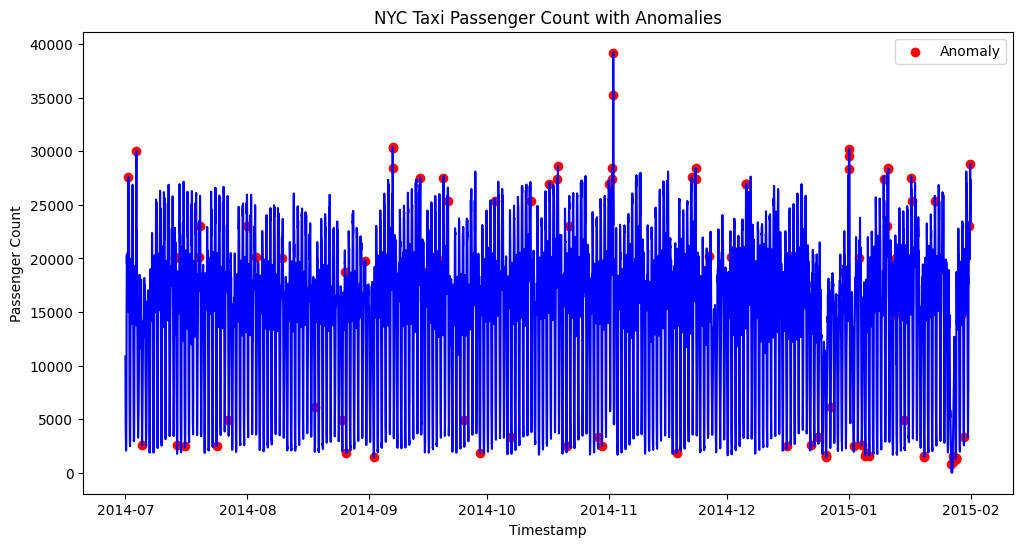

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['value'], color='blue')
plt.scatter(data.index[LocalOutlierFactorPredictions == -1], data['value'][LocalOutlierFactorPredictions == -1], color='red', label='Anomaly')
plt.xlabel('Timestamp')
plt.ylabel('Passenger Count')
plt.title('NYC Taxi Passenger Count with Anomalies')
plt.legend()
plt.show()

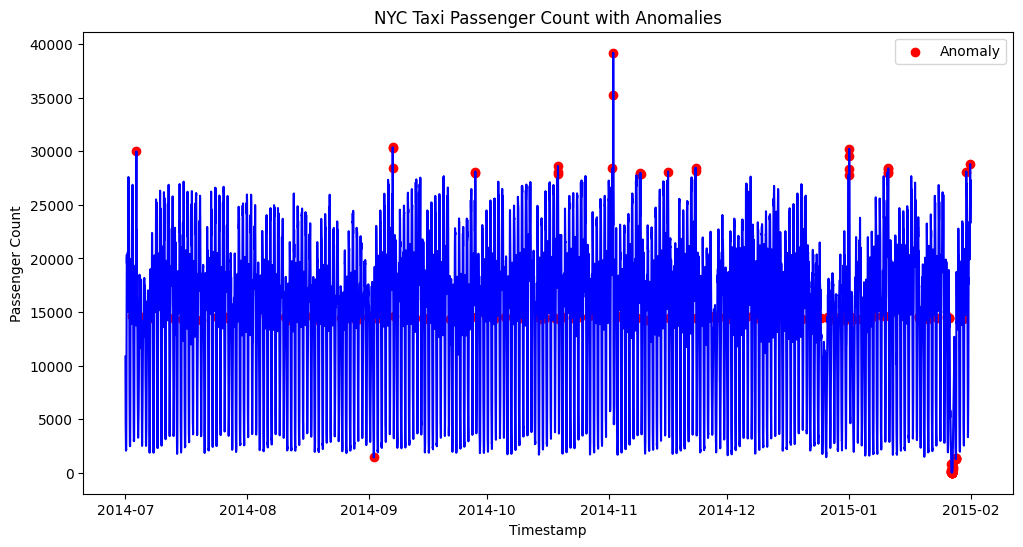

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['value'], color='blue')
plt.scatter(data.index[OneClassSVMPredictions == -1], data['value'][OneClassSVMPredictions == -1], color='red', label='Anomaly')
plt.xlabel('Timestamp')
plt.ylabel('Passenger Count')
plt.title('NYC Taxi Passenger Count with Anomalies')
plt.legend()
plt.show()

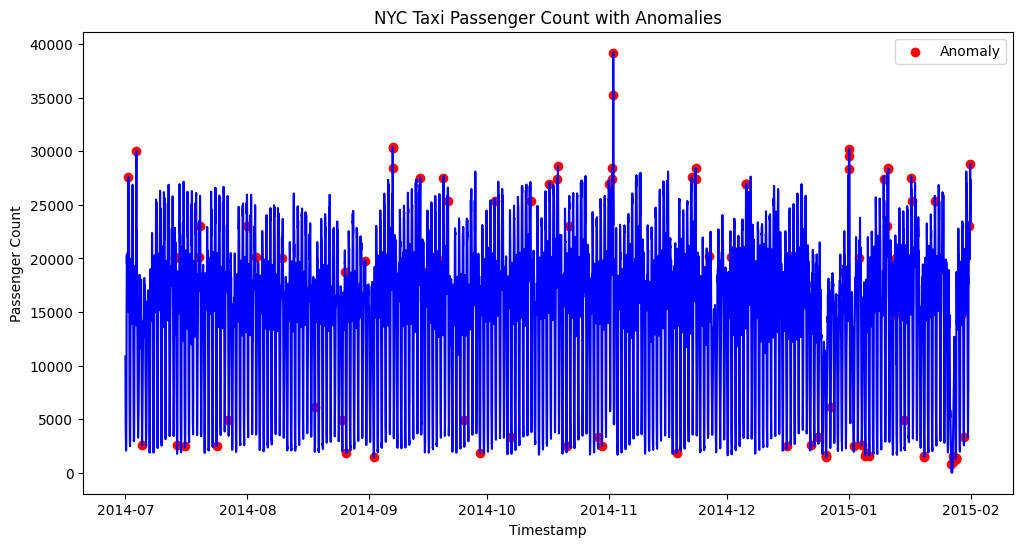

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['value'], color='blue')
plt.scatter(data.index[LocalOutlierFactorPredictions == -1], data['value'][LocalOutlierFactorPredictions == -1], color='red', label='Anomaly')
plt.xlabel('Timestamp')
plt.ylabel('Passenger Count')
plt.title('NYC Taxi Passenger Count with Anomalies')
plt.legend()
plt.show()